In [116]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
%autoreload 2
%matplotlib inline

import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from transformers.preprocessing import CountyTransformer, NoTransformer, RealestateTypeTransformer, PriceOutlierRemoval

In [118]:
train_data = pd.read_csv("data/traindata.csv")

In [119]:
cleanse_pipe = Pipeline(
    [('group_county', CountyTransformer()),
     ('type', RealestateTypeTransformer()),
     ('z_score_outlier_drop', PriceOutlierRemoval())])
cleaned_data = cleanse_pipe.fit_transform(train_data)

In [120]:
grouped_median_price = cleaned_data.groupby(['action', 'estate_type'])['Hind'].median()

In [121]:
grouped_median_price

action  estate_type  
RENT    APT                 330.000
        BUSINESS            500.000
        COTT_HOUSE          255.650
        GARAGE               70.000
        HOUSE               487.400
        PART_OF_HOUSE       420.000
        TERR_HOUSE          505.645
SALE    APT               63800.000
        BUSINESS           2162.000
        COTT_HOUSE        35000.000
        FARM              44000.000
        GARAGE             5000.000
        HOUSE             67000.000
        PART_OF_HOUSE     89900.000
        TERR_HOUSE       107000.000
Name: Hind, dtype: float64

# Convert non-numeric cols for visuals

In [122]:
cleaned_data['fac_action'] = cleaned_data['action'].factorize()[0]
cleaned_data['fac_est_type'] = cleaned_data['estate_type'].factorize()[0]

# Remove/add features

In [123]:
cleaned_data['Tube'] = abs(cleaned_data['Tube'])
cleaned_data['Korrus'] = abs(cleaned_data['Korrus'])
cleaned_data['price_median_multiplier'] = cleaned_data['Hind'] / cleaned_data.apply(lambda x : grouped_median_price[x['action']][x['estate_type']], axis=1)

# Visualize

In [114]:
cleaned_data.corr()

,id,Tube,Üldpind,Ehitusaasta,Korrus,Korruseid,Hind,price_median_multiplier,fac_action,fac_est_type
id,1.000000,-0.009699,-0.004634,0.011200,0.008531,-0.005005,0.135634,0.010389,0.026894,-0.036699
Tube,-0.009699,1.000000,0.036879,-0.030871,-0.020314,-0.031687,0.332260,0.166193,-0.134994,0.155026
Üldpind,-0.004634,0.036879,1.000000,-0.000559,-0.005760,-0.005000,0.013235,0.016114,-0.002808,0.054928
Ehitusaasta,0.011200,-0.030871,-0.000559,1.000000,0.072395,0.059407,0.033765,0.009940,0.013062,-0.056256
Korrus,0.008531,-0.020314,-0.005760,0.072395,1.000000,0.340427,0.032954,-0.007615,0.063702,-0.130079
Korruseid,-0.005005,-0.031687,-0.005000,0.059407,0.340427,1.000000,0.008233,0.010824,0.055328,-0.082199
Hind,0.135634,0.332260,0.013235,0.033765,0.032954,0.008233,1.000000,0.221038,-0.475193,-0.006929
price_median_multiplier,0.010389,0.166193,0.016114,0.009940,-0.007615,0.010824,0.221038,1.000000,-0.023942,0.108107
fac_action,0.026894,-0.134994,-0.002808,0.013062,0.063702,0.055328,-0.475193,-0.023942,1.000000,0.010385
fac_est_type,-0.036699,0.155026,0.054928,-0.056256,-0.130079,-0.082199,-0.006929,0.108107,0.010385,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8db31c0278>,
      dtype=object)

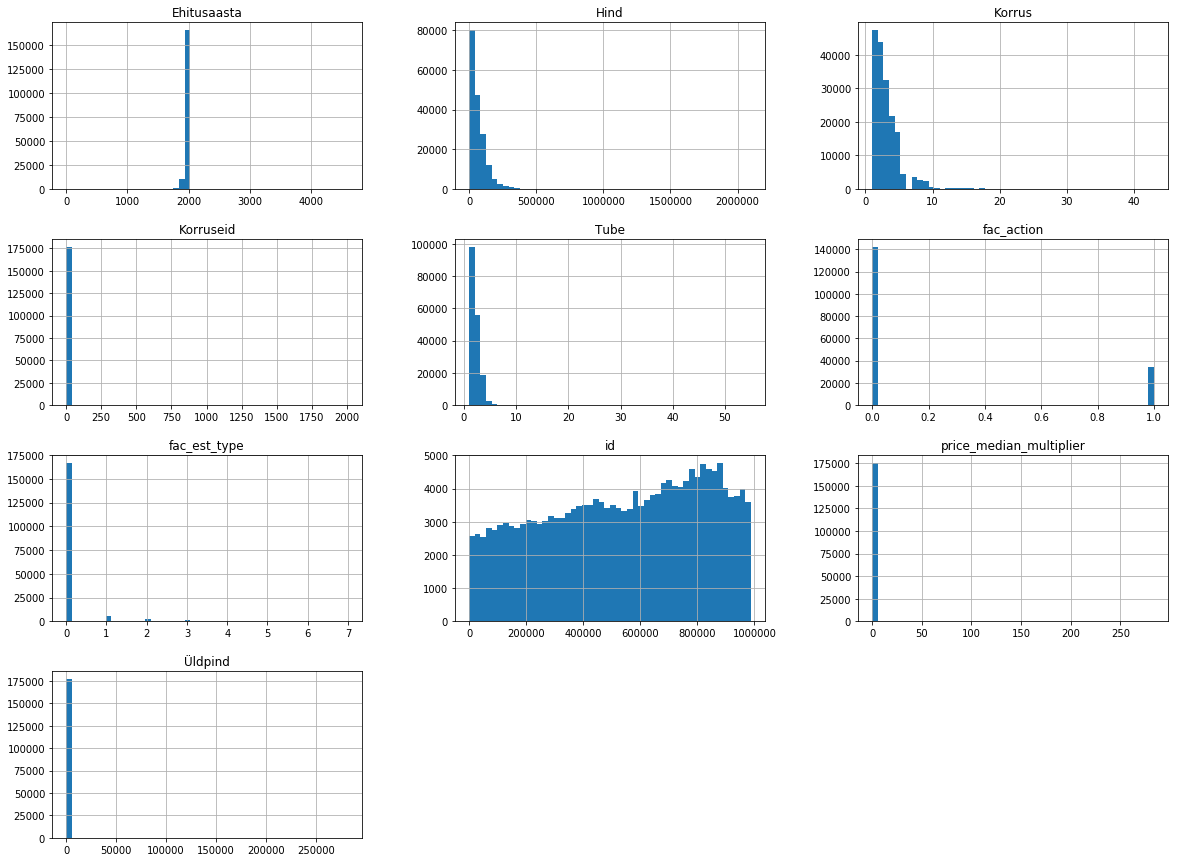

In [115]:
cleaned_data.hist(bins=50, figsize=(20,15))
